# Directionality analysis

This is an example of a directionality analysis using .TFBS from motif sites.

In [1]:
#Modules needed for this notebook
import seaborn as sns
import tfcomb.objects

## Create CombObj and fill it with .TFBS from motif scanning

In [2]:
C = tfcomb.objects.CombObj()

In [3]:
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4_masked.fa.gz", 
                   threads=8)

INFO: Scanning for TFBS with 8 thread(s)...
INFO: Progress: 10%
INFO: Progress: 23%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 62%
INFO: Progress: 70%
INFO: Progress: 83%
INFO: Progress: 91%
INFO: Finished!
INFO: Formatting scanned TFBS
INFO: Identified 580484 TFBS (401 unique names) within given regions


For this analysis, we will run count_within() with directional and stranded options turned on:

In [4]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 12%
INFO: Progress: 20%
INFO: Progress: 32%
INFO: Progress: 40%
INFO: Progress: 52%
INFO: Progress: 60%
INFO: Progress: 72%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [5]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP2(-)-SP2(-),SP2(-),SP2(-),1076,2293,2293,0.469254,73.955227
SP3(-)-SP2(-),SP3(-),SP2(-),920,1996,2293,0.430037,69.064539
SP2(-)-SP1(-),SP2(-),SP1(-),916,2293,2005,0.427205,78.613323
SP1(-)-SP2(-),SP1(-),SP2(-),910,2005,2293,0.424407,70.099512
KLF12(-)-KLF12(-),KLF12(-),KLF12(-),494,1165,1165,0.424034,66.196942
...,...,...,...,...,...,...,...
LHX3(+)-SP3(-),LHX3(+),SP3(-),1,618,1996,0.000900,-5.257039
LHX3(+)-SP1(+),LHX3(+),SP1(+),1,618,2006,0.000898,-6.276690
E2F4(-)-ZNF354A(-),E2F4(-),ZNF354A(-),1,885,1458,0.000880,-6.260829
KLF12(-)-AR(-),KLF12(-),AR(-),1,1165,1258,0.000826,-7.688648


## Analyze preferential directionality of motifs

First, we create a directionality analysis for the rules found:

In [6]:
df = tfcomb.analysis.directionality(C.rules)

The output dataframe contains the fraction of the TF1-TF2-counts which fall into each of the four scenarios, as well as a p-value of significance:

In [7]:
df.head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
65715,KLF12,KLF12,1990,0.380402,0.380402,0.118593,0.120603,0.150578,4.967985e-117
75937,KLF15,KLF15,2998,0.346564,0.346564,0.152769,0.154103,0.111504,1.255815e-96
77433,KLF6,KLF6,2876,0.347357,0.347357,0.150209,0.155076,0.112436,3.033861e-94
25703,SP4,SP4,2662,0.348986,0.348986,0.153268,0.148760,0.114314,3.707330e-90
32050,KLF12,KLF9,1586,0.385246,0.370744,0.128625,0.115385,0.148013,4.713030e-90
78652,PATZ1,PATZ1,3850,0.331688,0.331688,0.180260,0.156364,0.094829,9.951425e-90
79898,SP3,SP3,4448,0.325764,0.325764,0.183004,0.165468,0.087778,8.066478e-89
248,SP4,KLF15,2670,0.350562,0.345318,0.151311,0.152809,0.113113,1.555964e-88
67570,ZNF281,ZNF281,1992,0.361948,0.361948,0.136546,0.139558,0.129272,2.889701e-86
22045,SP4,KLF6,2690,0.354275,0.337175,0.151301,0.157249,0.110780,1.510227e-85


We can subset these on pvalue and number of sites

In [8]:
selected = df[(df["pvalue"] < 0.01) & (df["TF1_TF2_count"] > 50)]

In [9]:
#Number of TF pairs with significant differences in directionality
selected.shape[0]

5516

## Visualize different preferences for directionality

These preferences for directionality can be visualized with seaborn.clustermap as seen here:

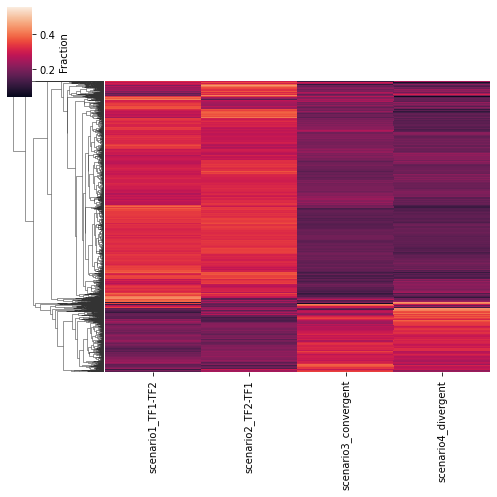

In [10]:
g = sns.clustermap(selected[["scenario1_TF1-TF2", "scenario2_TF2-TF1", "scenario3_convergent", "scenario4_divergent"]],
                        col_cluster=False,
                        yticklabels=False,
                        cbar_kws={'label': "Fraction"},
                        figsize=(7,7))

## In-depth look at preferential directionality

By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.

### TFs specific in TF1-TF2 orientation

In [11]:
selected.sort_values("scenario1_TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
68722,NR2C2,ZBTB7A,52,0.557692,0.153846,0.115385,0.173077,0.206526,0.000007
9795,ESR1,NR4A1,53,0.509434,0.188679,0.188679,0.113208,0.176577,0.000184
54959,ZNF816,HSF1,63,0.492063,0.111111,0.190476,0.206349,0.166667,0.000105
63280,ATF6,NR2F1,58,0.482759,0.120690,0.137931,0.258621,0.166865,0.000228
50863,ZBTB6,ESRRB,54,0.481481,0.129630,0.166667,0.222222,0.158943,0.000952
33158,FOXI1,FOXM1,57,0.473684,0.228070,0.175439,0.122807,0.155191,0.000907
53702,CREM,ZSCAN31,55,0.472727,0.218182,0.090909,0.218182,0.160148,0.000732
62861,ZBTB6,POU2F1,56,0.464286,0.196429,0.196429,0.142857,0.145072,0.002717
51025,FOXJ2,OVOL1,56,0.464286,0.178571,0.285714,0.071429,0.167515,0.000293
11197,RFX1,THRA,52,0.461538,0.153846,0.173077,0.211538,0.143051,0.005163


### TFs specific in TF2-TF2 orientation

In [12]:
selected.sort_values("scenario2_TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
38639,NR6A1,NR1I2,52,0.192308,0.500000,0.250000,0.057692,0.185122,0.000088
50915,HSF2,E2F3,54,0.148148,0.481481,0.166667,0.203704,0.156040,0.001259
28284,ZNF680,ZIC1,77,0.181818,0.480519,0.168831,0.168831,0.153802,0.000070
59479,ELF2,CRX,59,0.288136,0.474576,0.152542,0.084746,0.171946,0.000109
121,HIC1,PPARG,57,0.192982,0.473684,0.157895,0.175439,0.149809,0.001540
14137,JUND,ZNF449,55,0.109091,0.472727,0.236364,0.181818,0.157372,0.000963
22069,ELK1,ZIC1,79,0.240506,0.468354,0.126582,0.164557,0.153081,0.000059
46639,TBX21,HSF1,53,0.188679,0.452830,0.169811,0.188679,0.135512,0.008567
35759,ZEB1,SREBF1,53,0.245283,0.452830,0.169811,0.132075,0.143177,0.004556
66152,NR4A2,PPARA,73,0.205479,0.452055,0.123288,0.219178,0.141202,0.000567


### TFs specific in convergent orientation

In [13]:
selected.sort_values("scenario3_convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
53664,POU2F2,TFAP2C,52,0.173077,0.134615,0.480769,0.211538,0.157019,0.001516
31886,LHX3,STAT1,78,0.179487,0.153846,0.474359,0.192308,0.150425,0.000097
34929,ZNF329,INSM1,55,0.145455,0.181818,0.472727,0.200000,0.150206,0.001912
36035,E2F6,CDX2,63,0.142857,0.174603,0.460317,0.222222,0.143955,0.001327
51750,FOXA3,ZNF18,73,0.205479,0.123288,0.452055,0.219178,0.141202,0.000567
50440,HOXA10,HOXA10,62,0.145161,0.145161,0.451613,0.258065,0.144563,0.001403
32909,MAFB,ZNF329,51,0.176471,0.274510,0.450980,0.098039,0.152198,0.002675
71731,TAL1,ZNF350,63,0.190476,0.174603,0.444444,0.190476,0.129845,0.005219
59900,TAL1,TWIST1,63,0.206349,0.111111,0.444444,0.238095,0.140411,0.001900
51587,TWIST1,GATA1,57,0.140351,0.192982,0.438596,0.228070,0.130797,0.008478


### TFs specific in divergent orientation

In [14]:
selected.sort_values("scenario4_divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1-TF2,scenario2_TF2-TF1,scenario3_convergent,scenario4_divergent,std,pvalue
38186,PBX3,FOXJ2,52,0.192308,0.134615,0.192308,0.480769,0.156232,0.001630
8020,CDX2,HNF4A,61,0.131148,0.065574,0.327869,0.475410,0.187094,0.000011
74570,MECOM,ARID5B,57,0.210526,0.245614,0.087719,0.456140,0.153195,0.001106
66167,FOXJ2,PKNOX1,57,0.140351,0.140351,0.263158,0.456140,0.149123,0.001645
14452,HNF4G,CDX2,62,0.112903,0.145161,0.290323,0.451613,0.154984,0.000468
63243,SP2,HOXB4,51,0.235294,0.117647,0.196078,0.450980,0.142635,0.005988
59633,PAX6,E2F7,52,0.115385,0.173077,0.269231,0.442308,0.143051,0.005163
42415,RORA,ZFP42,52,0.173077,0.076923,0.307692,0.442308,0.159356,0.001219
52739,ZNF274,THRA,59,0.101695,0.254237,0.203390,0.440678,0.142060,0.002538
19405,LHX2,HOXA9,75,0.186667,0.200000,0.173333,0.440000,0.127134,0.002248
